# 87651260 Applications of Geographic Information System

# Twitter Sentiment Analysis
## Reference : https://github.com/Gunjan933/twitter-sentiment-analysis

## Attawut Nardkulpat, Reseach Officer, Burapha University
### attawut@buu.ac.th
### 14/08/2020

In [4]:
!pip install --user scipy wordcloud nltk seaborn textblob nltk

In [6]:
!pip install wordcloud

# Import the packages

In [9]:
import numpy as np
import pandas as pd
import json
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
nltk.download('wordnet')   # for Lemmatization

%matplotlib inline

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Attawutn\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [10]:
total_data = pd.read_csv("train.csv", encoding="ISO-8859-1")

In [11]:
with open('contractions.json', 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict['contractions']

In [12]:
pd.set_option('display.max_colwidth', -1)

C:\Users\Attawutn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


# Printing the dataset

In [15]:
total_data.tail(10)

,ItemID,Sentiment,SentimentText
99979,99991,1,@cunningstunts till i can go home been here till saturday x
99980,99992,1,@cunningstunts22 afternoon jim hows you x
99981,99993,0,@cup_a_tea The foot is really bad. Like the worst it's ever been. I can barely walk right now.
99982,99994,1,@Cup_Of_Katy Have fun doing health &amp; safety :S Just switch off and look spritely XXX
99983,99995,0,@cupati It took me waaay too long to get your message about being ashamed...right now I really am ashamed
99984,99996,0,@Cupcake seems like a repeating problem hope you're able to find something.
99985,99997,1,"@cupcake__ arrrr we both replied to each other over different tweets at the same time , i'll see you then, Duno where the hell Kateyy is!"
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had more fun with me.
99988,100000,1,@cupcake_kayla haha yes you do


# Taking column names into variables

In [16]:
tweet = total_data.columns.values[2]
sentiment = total_data.columns.values[1]
tweet, sentiment

('SentimentText', 'Sentiment')

In [ ]:
total_data.info()

# 1)  Preprocessing

* **Convert every tweets to lower case**
* **Remove Twitter username**
* **Remove punctuations, numbers and special characters**
* **Convert more than 2 letter repetitions to 2 letter ( example (wooooooow --> woow))**
* **Remove extra spaces**
* **Remove URLs**
* **Emoji analysis**
* **Handle contractions words**
    - **" can't " >> " can not "**
    - **" won't " >> " will not "**
    - **" should't " >> " should not "**
* **Tokenization**
* **(Optional) Remove [Stop words](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/)**
* **(Optional) Text Normalization ([Stemming](https://www.geeksforgeeks.org/python-stemming-words-with-nltk/) / [Lemmatization](https://www.geeksforgeeks.org/python-lemmatization-with-nltk/))**

# Define a function which handles emoji classifications

In [17]:
def emoji(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' positiveemoji ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', tweet)
    return tweet

# Define a function which will preprocess the tweets

In [18]:
import re

def process_tweet(tweet):
    tweet = tweet.lower()                                             # Lowercases the string
    tweet = re.sub('@[^\s]+', '', tweet)                              # Removes usernames
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   # Remove URLs
    tweet = re.sub(r"\d+", " ", str(tweet))                           # Removes all digits
    tweet = re.sub('&quot;'," ", tweet)                               # Remove (&quot;) 
    tweet = emoji(tweet)                                              # Replaces Emojis
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
    for word in tweet.split():
        if word.lower() in contractions:
            tweet = tweet.replace(word, contractions[word.lower()])   # Replaces contractions
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Removes all punctuations
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Convert more than 2 letter repetitions to 2 letter
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space    
    return tweet

# Now make a new column for side by side comparison of new tweets vs old tweets

In [19]:
total_data['processed_tweet'] = np.vectorize(process_tweet)(total_data[tweet])

# Let's compare unprocessed tweets with the processed one

In [20]:
total_data.head(5)

,ItemID,Sentiment,SentimentText,processed_tweet
0,1,0,is so sad for my APL friend.............,is so sad for my apl friend
1,2,0,I missed the New Moon trailer...,missed the new moon trailer
2,3,1,omg its already 7:30 :O,omg its already
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,omgaga im soo im gunna cry ve been at this dentist since was suposed just get crown put on mins
4,5,0,i think mi bf is cheating on me!!! T_T,think mi bf is cheating on me t_t


# Spelling correction

In [ ]:
#from textblob import TextBlob
#total_data['processed_tweet'].apply(lambda x: str(TextBlob(x).correct()))
#total_data.head(10)

# Tokenization

In [21]:
tokenized_tweet = total_data['processed_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [is, so, sad, for, my, apl, friend]                                                                                 
1    [missed, the, new, moon, trailer]                                                                                   
2    [omg, its, already]                                                                                                 
3    [omgaga, im, soo, im, gunna, cry, ve, been, at, this, dentist, since, was, suposed, just, get, crown, put, on, mins]
4    [think, mi, bf, is, cheating, on, me, t_t]                                                                          
Name: processed_tweet, dtype: object

# Stemming

In [22]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet.head()

0    [is, so, sad, for, my, apl, friend]                                                                           
1    [miss, the, new, moon, trailer]                                                                               
2    [omg, it, alreadi]                                                                                            
3    [omgaga, im, soo, im, gunna, cri, ve, been, at, thi, dentist, sinc, wa, supos, just, get, crown, put, on, min]
4    [think, mi, bf, is, cheat, on, me, t_t]                                                                       
Name: processed_tweet, dtype: object

# Lemmatization

In [24]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()

0    [is, so, sad, for, my, apl, friend]                                                                           
1    [miss, the, new, moon, trailer]                                                                               
2    [omg, it, alreadi]                                                                                            
3    [omgaga, im, soo, im, gunna, cri, ve, been, at, thi, dentist, sinc, wa, supos, just, get, crown, put, on, min]
4    [think, mi, bf, is, cheat, on, me, t_t]                                                                       
Name: processed_tweet, dtype: object

### Stop words

In [ ]:
stop_words = {"i", "me", "my", "myself", "we", "our", "ours", "ourselves",
            "you", "your", "yours", "yourself", "yourselves", "he", "him",
            "his", "himself", "she", "her", "hers", "herself", "it", "its",
            "itself", "they", "them", "their", "theirs", "themselves", "what",
            "which", "who", "whom", "this", "that", "these", "those", "am", "is",
            "are", "was", "were", "be", "been", "being", "have", "has", "had",
            "having", "do", "does", "did", "doing", "a", "an", "the", "and",
            "but", "if", "or", "because", "as", "until", "while", "of", "at",
            "by", "for", "with", "about", "against", "between", "into", "through",
            "during", "before", "after", "above", "below", "to", "from", "up",
            "down", "in", "out", "on", "off", "over", "under", "again", "further",
            "then", "once", "here", "there", "when", "where", "why", "how", "all",
            "any", "both", "each", "few", "more", "most", "other", "some", "such",
            "only", "own", "same", "so", "than", "too", "very",
            "can", "will", "just", "should", "now"}

In [ ]:
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words, nltk.corpus.stopwords.words('english')

# 2) Most used words

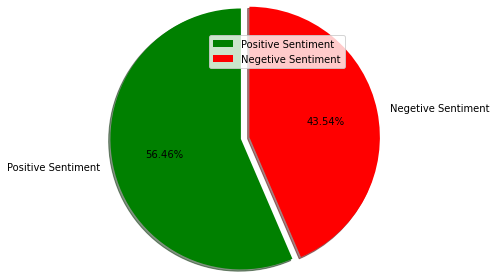

In [25]:
sentiments = ['Positive Sentiment', 'Negetive Sentiment'] 
slices = [(total_data[sentiment] != 0).sum(), (total_data[sentiment] == 0).sum()] 
colors = ['g', 'r'] 
plt.pie(slices, labels = sentiments, colors=colors, startangle=90, shadow = True,
        explode = (0, 0.1), radius = 1.5, autopct = '%1.2f%%') 
plt.legend()
plt.show() 

## 2.2) Most used positive words

<Figure size 3600x2400 with 0 Axes>

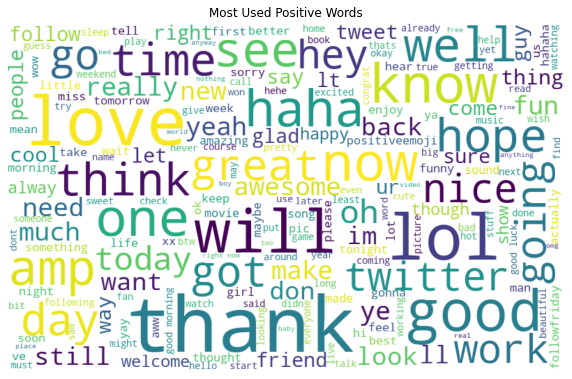

In [26]:
positive_words =' '.join([text for text in total_data['processed_tweet'][total_data[sentiment] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(positive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Positive Words")
#plt.savefig('positive_words.png')
plt.show()

## 2.3) Most used negetive words

<Figure size 3600x2400 with 0 Axes>

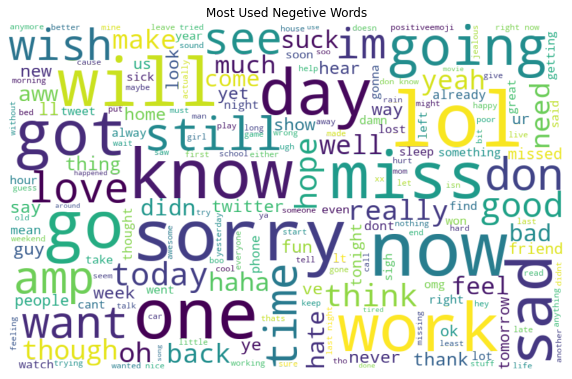

In [27]:
negetive_words =' '.join([text for text in total_data['processed_tweet'][total_data[sentiment] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, 
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(negetive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Negetive Words")
#plt.savefig('negetive_words.png')
plt.show()

# 3) Feature extraction (vectorization)

## Count vectorizer

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()    # Unigram and Bigram
final_vectorized_data = count_vectorizer.fit_transform(total_data['processed_tweet'])  
final_vectorized_data

<99989x48958 sparse matrix of type '<class 'numpy.int64'>'
	with 1080417 stored elements in Compressed Sparse Row format>

# 4) Splitting

##### Splitting train data to test accuracy

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, total_data[sentiment],
                                                    test_size=0.3, random_state=69)  

##### Printing splitted dataset sizes

In [30]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (69992, 48958)
X_test_shape :  (29997, 48958)
y_train_shape :  (69992,)
y_test_shape :  (29997,)


# 5) Train and predict

## 5.1) Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression().fit(X_train, y_train)
predicted_lr = model_lr.predict(X_test)

C:\Users\Attawutn\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


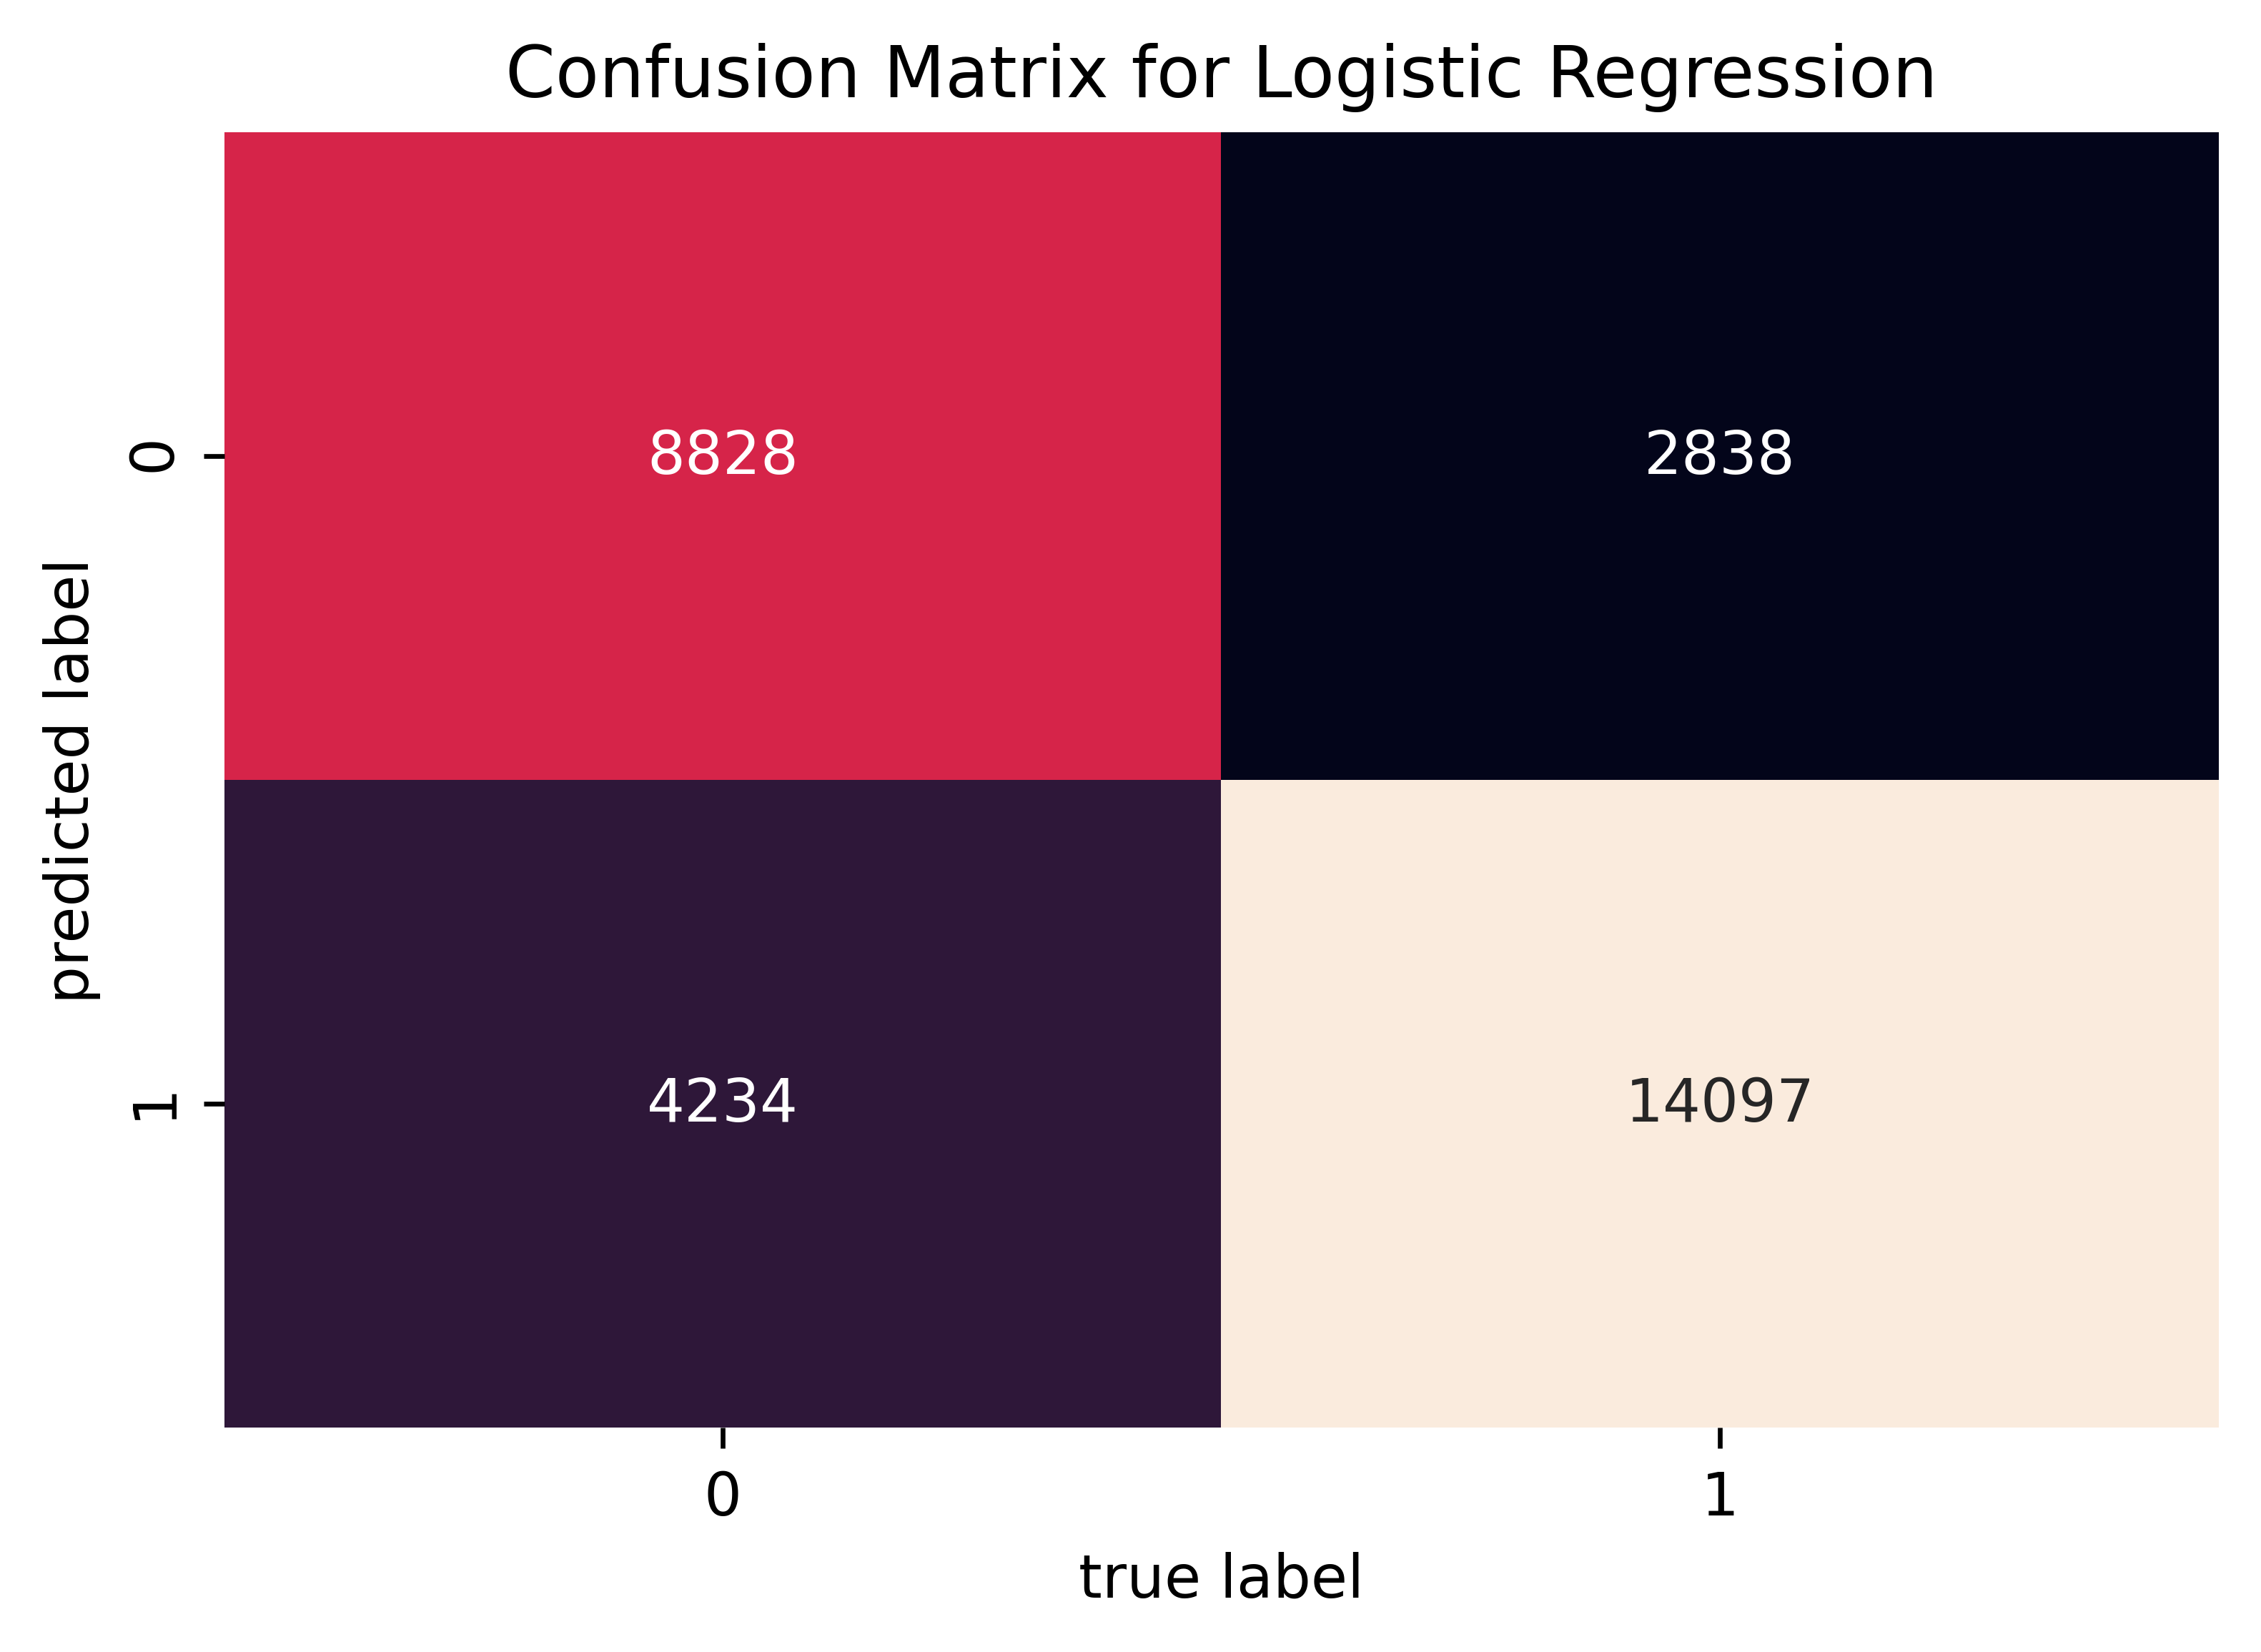

In [32]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_lr)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.savefig(confusion_matrix.png")
plt.show()

In [33]:
from sklearn.metrics import accuracy_score

score_lr = accuracy_score(predicted_lr, y_test)
print("Accuracy with Logistic Regression: ",score_lr)

Accuracy with Logistic Regression:  0.7642430909757643


## 5.2) Naive_bayes

### There are some popular classifiers under Naive Bayes
* **Bernoulli Naive Bayes**
* **Gaussian Naive Bayes classifier**
* **Multinomial Naive Bayes**

In [34]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

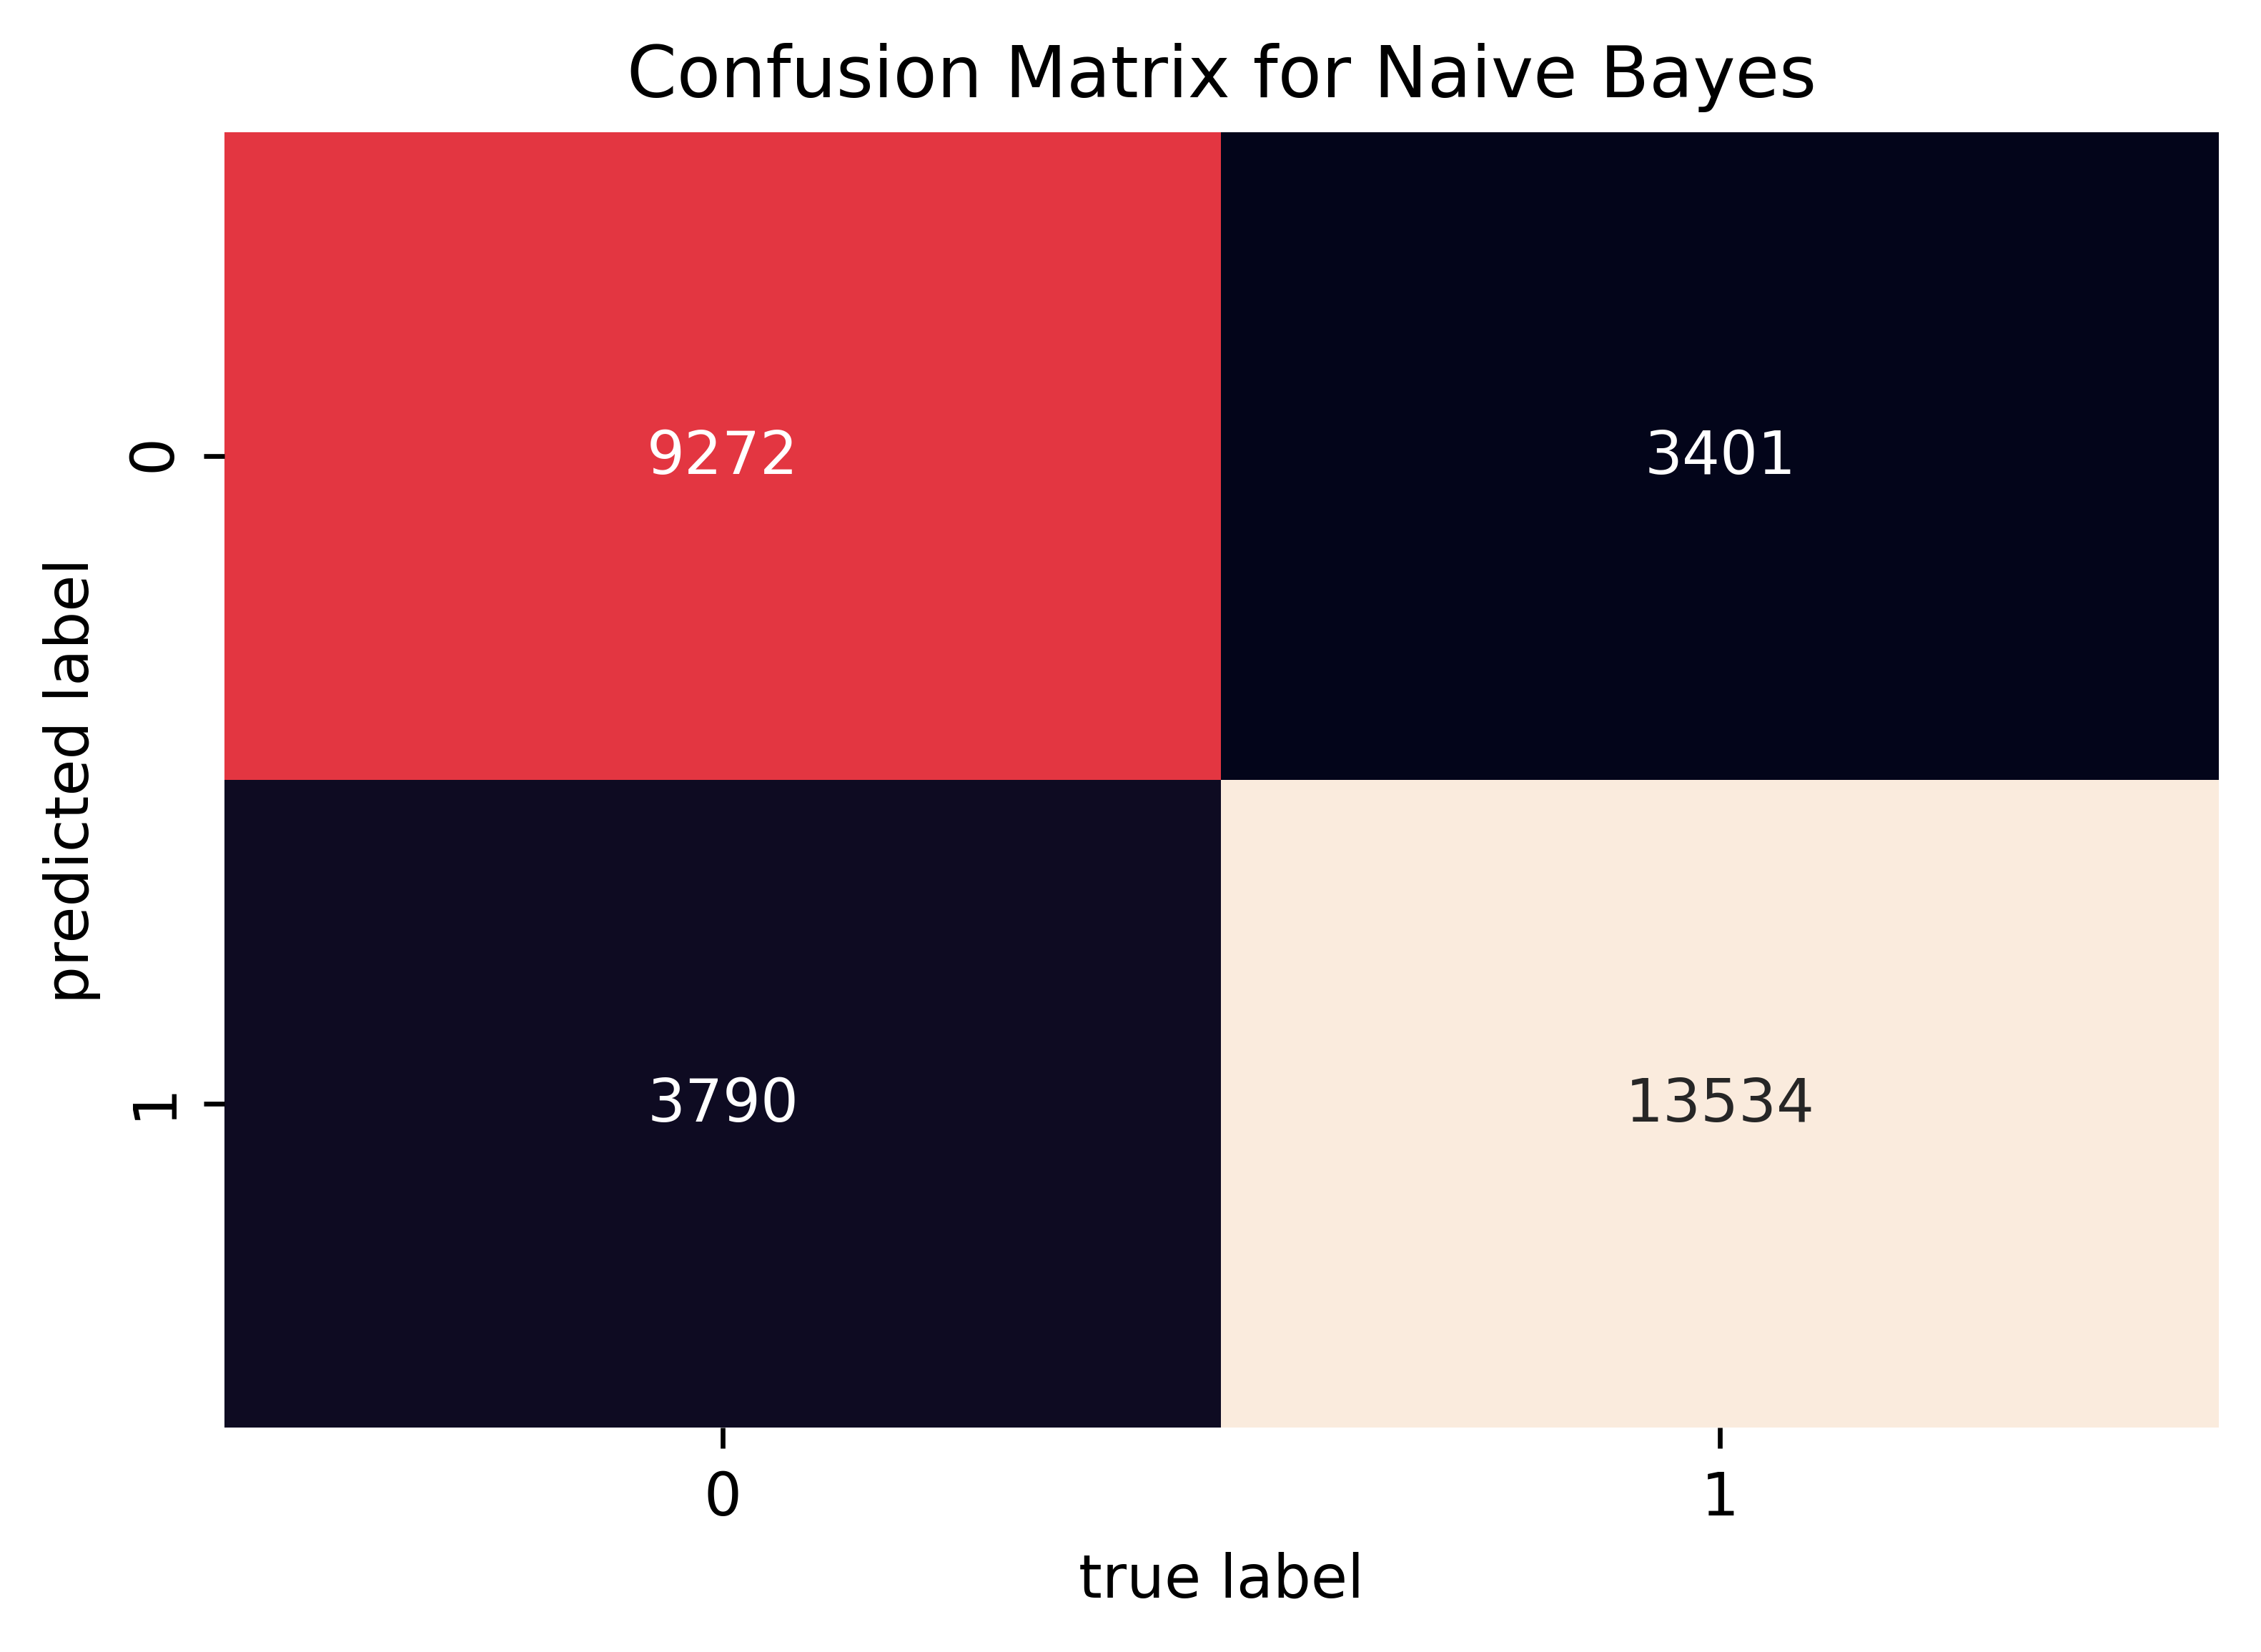

In [35]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.savefig(confusion_matrix.png")
plt.show()

In [36]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.7602760276027603


# 6) Precision, Recall, and Accuracy

##### Precision, recall, and accuracy are standard metrics used to evaluate the performance of a classifier.

* Precision measures how many texts were predicted correctly as belonging to a given category out of all of the texts that were predicted (correctly and incorrectly) as belonging to the category.

* Recall measures how many texts were predicted correctly as belonging to a given category out of all the texts that should have been predicted as belonging to the category. We also know that the more data we feed our classifiers with, the better recall will be.

* Accuracy measures how many texts were predicted correctly (both as belonging to a category and not belonging to the category) out of all of the texts in the corpus.

##### Most frequently, precision and recall are used to measure performance since accuracy alone does not say much about how good or bad a classifier is.

## Logistic Regression

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_lr))

              precision    recall  f1-score   support

           0       0.76      0.68      0.71     13062
           1       0.77      0.83      0.80     16935

    accuracy                           0.76     29997
   macro avg       0.76      0.75      0.76     29997
weighted avg       0.76      0.76      0.76     29997



## Drawing ROC curve

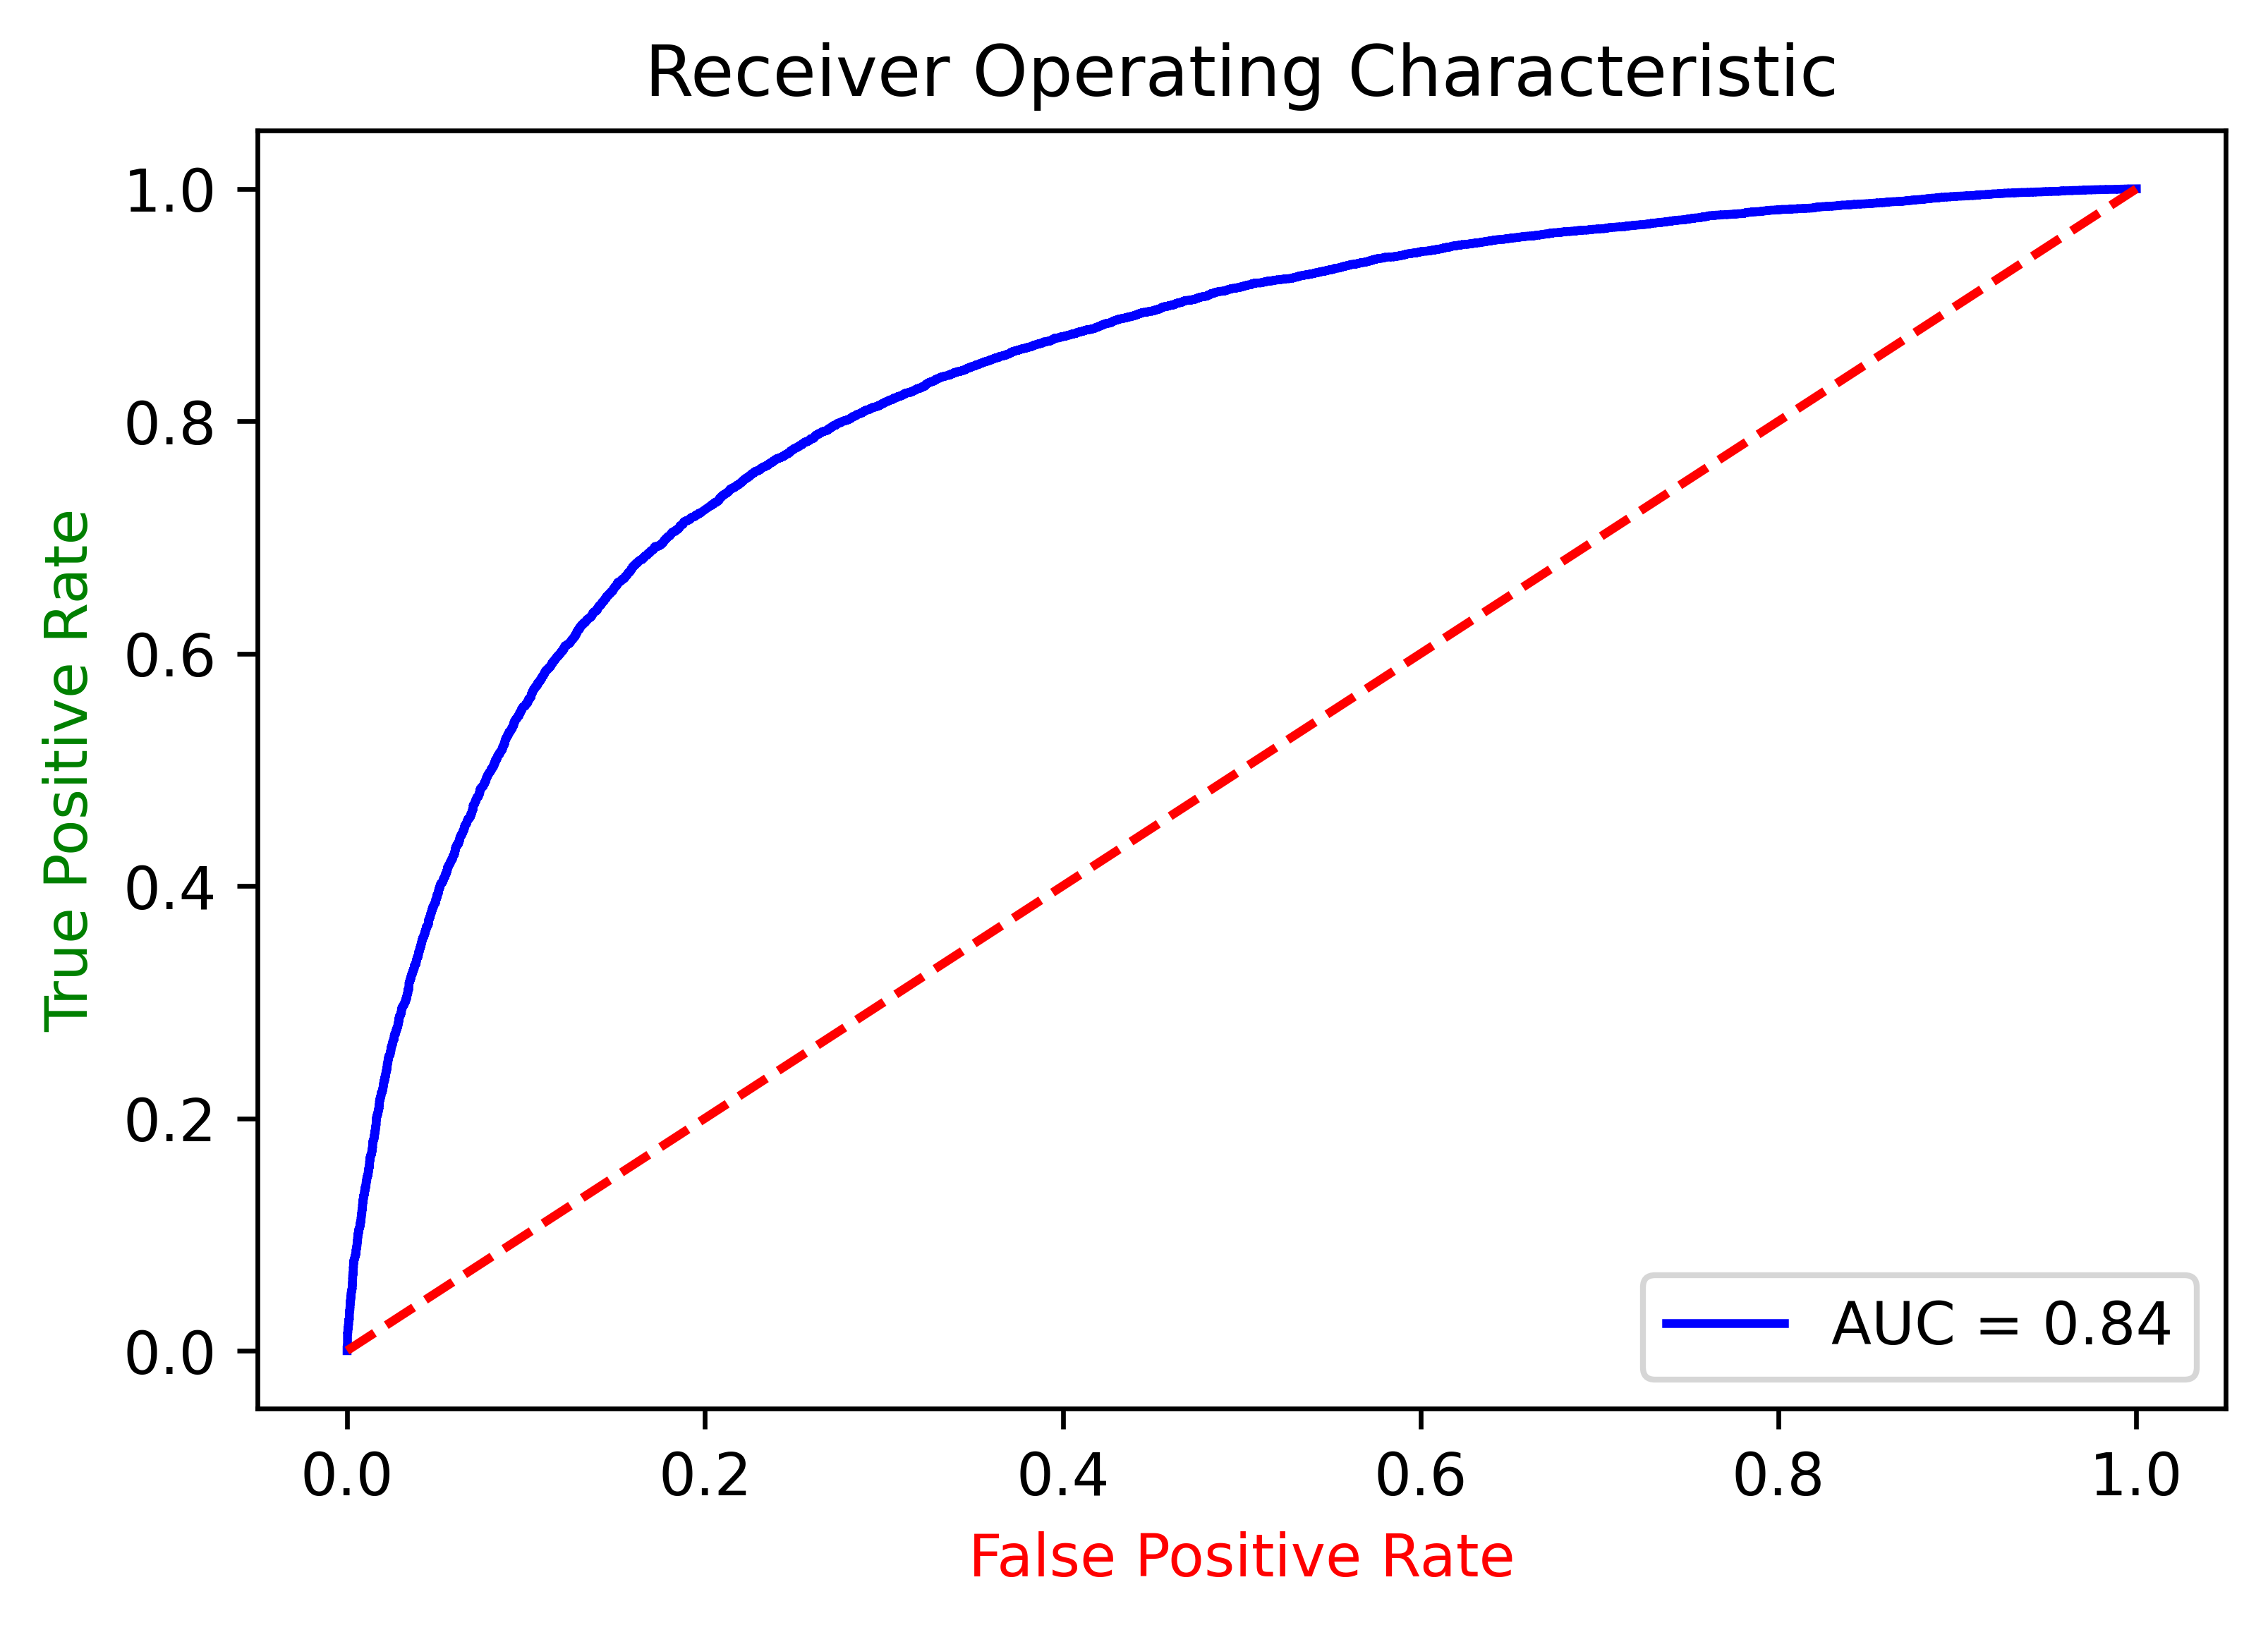

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# calculate the fpr and tpr for all thresholds of the classification
probs = model_lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.figure(dpi=600)                       # to plot high quality graph
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate', color='g')
plt.xlabel('False Positive Rate', color='r')
#plt.savefig("ROC_curve.png")
plt.show()

## Naive Bayes

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72     13062
           1       0.78      0.80      0.79     16935

    accuracy                           0.76     29997
   macro avg       0.76      0.75      0.76     29997
weighted avg       0.76      0.76      0.76     29997



## Drawing ROC curve

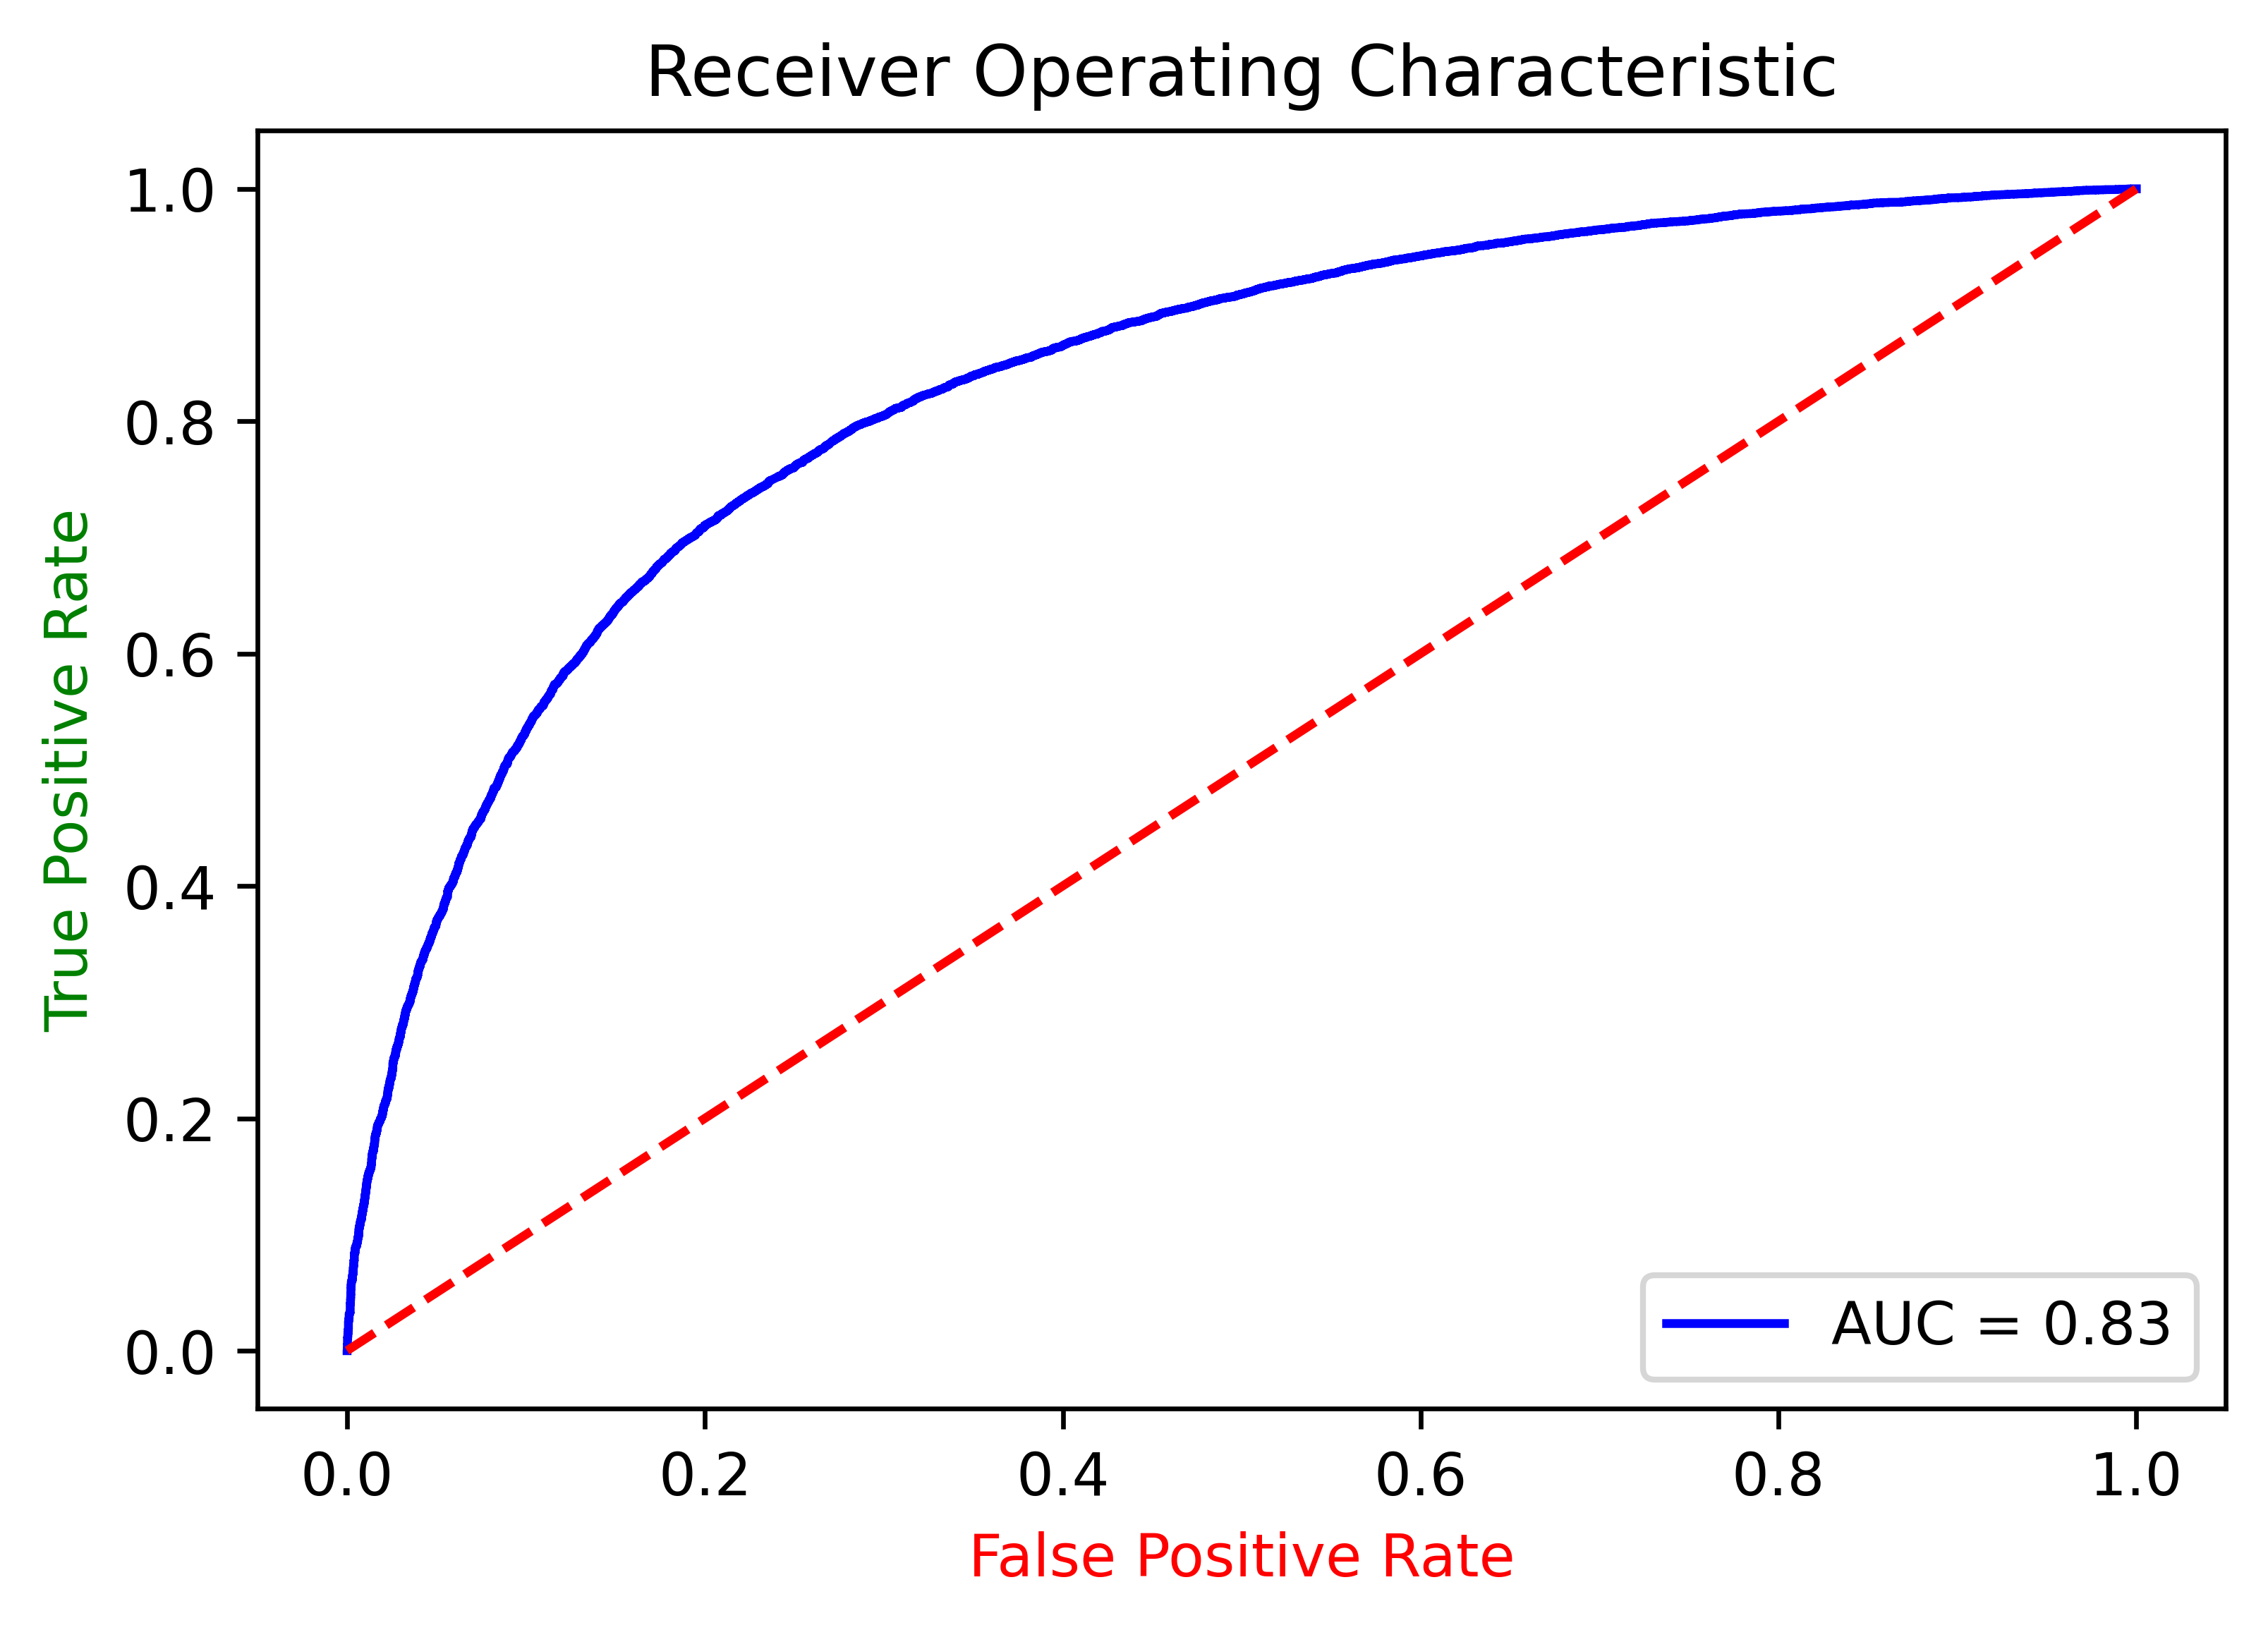

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# calculate the fpr and tpr for all thresholds of the classification
probs = model_naive.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.figure(dpi=600)                       # to plot high quality graph
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate', color='g')
plt.xlabel('False Positive Rate', color='r')
#plt.savefig("ROC_curve.png")
plt.show()